## Infinite Row of Vortices

In [34]:
# Library Imports
import numpy as np
from matplotlib import pyplot
import math
%run ezPlot.py                                      # Library of Commonly Used Functions 

In [65]:
# Parameters for Grid Domain
N = 200                                               # number of points in domain
x_start, x_end = -6., 6.                             # start and end points of x-dir 
y_start, y_end = -2., 2.                             # stand and end points of y-dir
x = np.linspace(x_start, x_end, N)                   # generating interval linear space of x-dir
y = np.linspace(y_start, y_end, N)                   # generating interval linear space of y-dir
X, Y = np.meshgrid(x, y)                             # Generating 2D meshed grid in x-, y-directions

In [61]:
# Define Vortices Locations and Strengths
a_vortex = 0.4                                                        # spacing between each vortex
N_vortex = (x_end - x_start) / a_vortex + 1

# Vortex Characteristics
gamma = 1.0                                                           # strength of vortex
x_vortex = np.arange(x_start, x_end + a_vortex, a_vortex)             # location of vortex in cartesian coords. [X-DIR]
y_vortex = np.zeros(int(N_vortex), dtype=float)                       # location of vortices in cartesian [Y-DIR]

In [62]:
# Initialize Velocity Vectors
u_tot = np.zeros((N, N), dtype=float)
v_tot = np.zeros((N, N), dtype=float)

In [63]:
# Loop to Calculate Superposition of Vortex Row

for i in range(x_vortex.size):
    u_vortex, v_vortex, psi_vortex = ezVortexChars(gamma, x_vortex[i], y_vortex[i], X, Y)
    
    u_tot = u_tot + u_vortex
    v_tot = v_tot + v_vortex

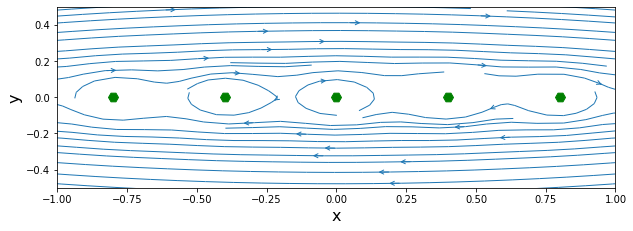

In [72]:
# Plot Streamlines for Row of Vortices
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-1, 1.0)
pyplot.ylim(-0.5, 0.5)
pyplot.streamplot(X, Y, u_tot, v_tot, density = 4,
                 linewidth = 1, arrowsize=1, arrowstyle = '->')
pyplot.scatter(x_vortex, y_vortex, color='g', s=100, marker='H')

## Complex Potential

In [88]:
def complex_potential(strength, a, X, Y):
    """
    Returns the velocity components of a complex potential vortex
    
    Parameters:
    ---------
    strength: Strength of the vortex
    a : distance between the vortices
    X, Y: the meshed grid
    
    Returns:
    -------
    u, v : velocity components in cartesian coordinates
    """
    u = +strength/(2*a) * (np.sinh(2*np.pi*Y / a) / (np.cosh(2*np.pi*Y/a) - np.cos(2*np.pi*X/a)))
    v = -strength/(2*a) * (np.sin(2*np.pi*X / a) / (np.cosh(2*np.pi*Y/a) - np.cos(2*np.pi*X/a)))
    
    return u, v

In [89]:
u_n, v_n = complex_potential(gamma, a_vortex, X, Y)

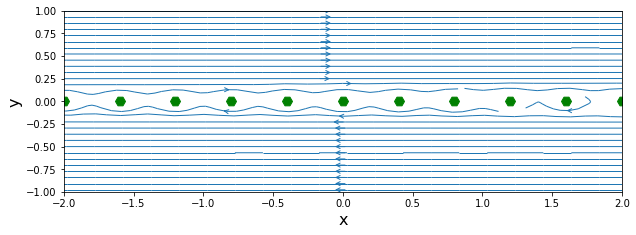

In [90]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(-2, 2.0)
pyplot.ylim(-1., 1.)
pyplot.streamplot(X, Y, u_n, v_n, density = 2,
                 linewidth = 1, arrowsize=1, arrowstyle = '->')
pyplot.scatter(x_vortex, y_vortex, color='g', s=100, marker='H')

In [91]:
~

SyntaxError: invalid syntax (<ipython-input-91-f73ee080cfb5>, line 1)